<a href="https://colab.research.google.com/github/lucynjora/machine_learning_assignment/blob/main/randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Random Forest

1. A Random Forest model to predict house prices
2. Analysis of the Performance of the Model

In [ ]:
#importing the libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Loading the Dataset
df = pd.read_csv("Real estate.csv")
df.head(30)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [ ]:
#The information about the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
#checking for Null values and outliers.
null_values = df.isnull().sum()
print("Total Null values")
null_values

Total Null values


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

C:\Users\PC\AppData\Local\Temp\ipykernel_14392\1224588675.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_house_price_by_age = df.groupby('house age bin')['Y house price of unit area'].mean()


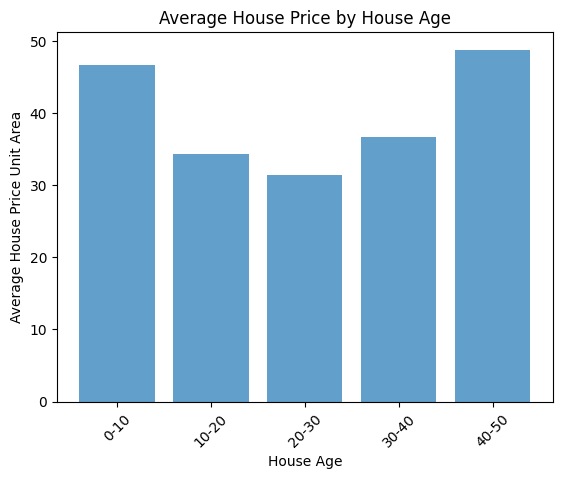

In [ ]:
#A bar graph to visualize X2 house age against the Y house price of unit area.

# Defining bin edges for house ages
bin_edges = [0, 10, 20, 30, 40, 50, np.inf]
bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']

# Creating a new column in the DataFrame to represent the age bin of each house
df['house age bin'] = pd.cut(df['X2 house age'], bins=bin_edges, labels=bin_labels, right=False)

# Calculating the average house price for each age bin
avg_house_price_by_age = df.groupby('house age bin')['Y house price of unit area'].mean()

# Plotting
plt.bar(avg_house_price_by_age.index, avg_house_price_by_age.values, alpha=0.7)
plt.xlabel('House Age')
plt.ylabel('Average House Price Unit Area')
plt.title('Average House Price by House Age')
plt.xticks(rotation=45)
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_14392\1346977183.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_house_price = df.groupby(distance_ranges)[target].mean()


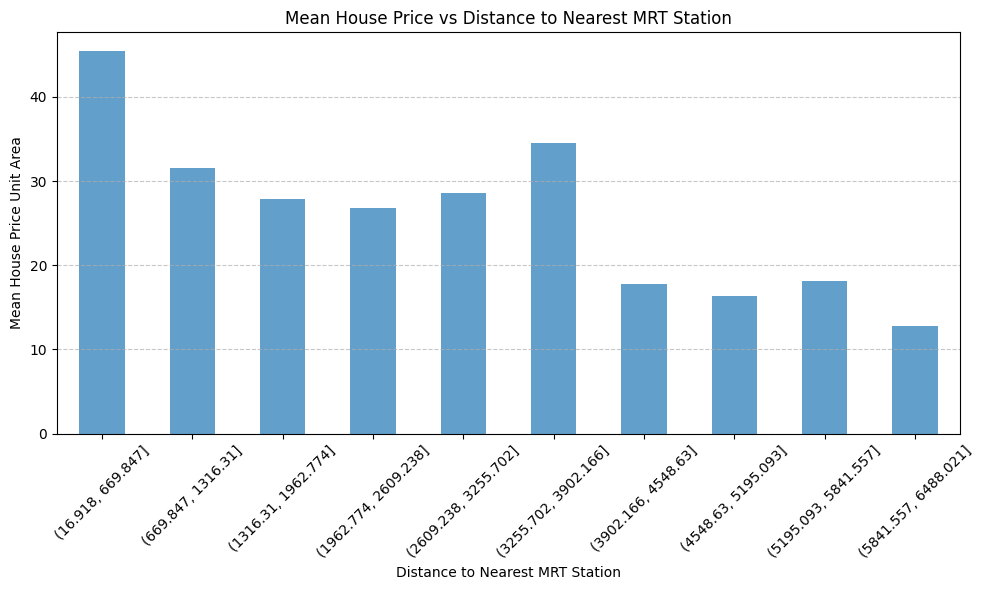

In [ ]:
#A bar graph to visualize X3 distance to the nearest MRT station against the Y house price of unit area.

# Defining bin edges for house ages
feature = 'X3 distance to the nearest MRT station'
target = 'Y house price of unit area'

# Group data by distance ranges and calculate mean house price for each range
distance_ranges = pd.cut(df[feature], bins=10)
mean_house_price = df.groupby(distance_ranges)[target].mean()

# Plot the bar graph
plt.figure(figsize=(10, 6))
mean_house_price.plot(kind='bar', alpha=0.7)
plt.xlabel('Distance to Nearest MRT Station')
plt.ylabel('Mean House Price Unit Area')
plt.title('Mean House Price vs Distance to Nearest MRT Station')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Dropping features that will not be helpful in the Predicion.
new_df = df.drop(["No", "X5 latitude", "X6 longitude", "house age bin"], axis=1)
new_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [ ]:
#Splitting the Data to Training and Testing Data

from sklearn.model_selection import train_test_split
# Features
X = new_df.drop('Y house price of unit area', axis=1)
# Target variable
y = new_df['Y house price of unit area']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [ ]:
#Creating the Random Forest model

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=100)

#Fitting the Training Data to the model
rf.fit(X_train, y_train)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse i

RandomForestRegressor(random_state=100)

In [ ]:
# Make predictions
y_pred = rf.predict(X_test)
y_pred

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array([42.265     , 31.6493    , 61.3275    , 35.827     , 49.615     ,
       25.642     , 41.965     , 49.615     , 65.49575   , 26.408     ,
       35.951     , 47.102     , 32.77966667, 36.868     , 47.186     ,
       35.268     , 55.04465   , 40.45633333, 29.384     , 18.368     ,
       15.884     , 40.482     , 30.796     , 47.781     , 24.909     ,
       36.237     , 28.8031    , 41.266     , 38.512     , 37.432     ,
       52.154     , 34.1922    , 41.137     , 52.228     , 31.716     ,
       40.399     , 27.88128571, 15.73606667, 37.476     , 53.965     ,
       46.243     , 38.922     , 25.1513    , 28.993     , 39.726     ,
       45.515     , 53.716     , 24.315     , 40.58533333, 52.15885714,
       43.882     , 27.09      , 30.063     , 29.426     , 63.762     ,
       44.966     , 55.7094    , 27.119     , 50.018     , 25.189     ,
       39.272     , 58.084     , 47.7534    , 39.596     , 31.9908    ,
       36.226     , 48.295     , 44.839     , 36.826     , 47.26

In [ ]:
#Calculating Performance Metrix

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 27.230953048998614
Mean Absolute Error (MAE): 3.9956683878370667
R-squared (R2): 0.8175842265447315


c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future vers